![title](Header__0005_5.png "Header")
___
# Chapter 5 - Outlier Analysis
## Segment 1 - Extreme value analysis using univariate methods

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [9]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [10]:
df = pd.read_csv(
    filepath_or_buffer='iris.data.csv',
    header=None,
    sep=',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Identifying outliers from Tukey boxplots

[]

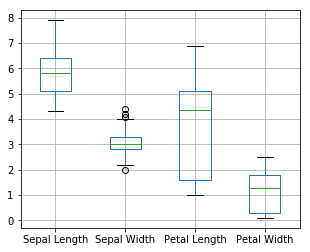

In [11]:
df.boxplot(return_type='dict')
plt.plot()

In [12]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [13]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


In [23]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(X)
print(X_df.quantile([.1, .25, .5, .75], axis =0) )

        0    1    2    3
0.10 4.80 2.50 1.40 0.20
0.25 5.10 2.80 1.60 0.30
0.50 5.80 3.00 4.35 1.30
0.75 6.40 3.30 5.10 1.80


### Applying Tukey outlier labeling

In [26]:
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)


X_df.describe()

,0,1,2,3
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [54]:
def tukey_label(data):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    #print(f"{IQR:.2f},{Q1:.2f},{Q3:.2f}")
    outlier_1 = Q1 - (IQR * 1.5)
    outlier_2 = Q3 + (IQR * 1.5)
    return (outlier_1,outlier_2)

In [56]:
print(tukey_label(X_df[[0]]))
print(tukey_label(X_df[[1]]))
print(tukey_label(X_df[[2]]))
print(tukey_label(X_df[[3]]))

(3.1499999999999986, 8.350000000000001)
(2.05, 4.05)
(-3.649999999999999, 10.349999999999998)
(-1.95, 4.05)


In [44]:
X_df[[0]].quantile([.75])[[0]]

,0
0.8,6.4


In [46]:
np.quantile(X_df[[0]], 0.75)

6.4